DecisionTree



1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' 

2) Create a dataframe and print the first and last seven records of your dataset.  

3) Print the class labels. 

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 

### DecisionTree 
1) Use gini and entropy to measure the quality of a split. 

2) Use comments to explain your code and variable names. 

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.

4) Print the decision tree visualization for 3 different depths using given libraries.  

# Naive Bayes 

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.

2) Use comments to explain your code and variable names

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. 



1) Describe the Decision Tree methods

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code.

4) Visualization of the decision tree for gini and entropy.

5) Interpret your results, compare gini and entropy 

6) Visualize the dataset, for the target variable - 2 graphs



# 1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' 

In [1]:
#importing libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
dataset1= pd.read_csv('C:/Users/Anu/Downloads/PA2 (1)/Gender_Classifier.csv',encoding='latin1')

# 2) Create a dataframe and print the first and last seven records of your dataset.

In [3]:
dataset1.head(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/2015 1:47,female,1.0000,yes,1.0,3/11/2010 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/2015 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/2015 1:57,brand,1.0000,yes,1.0,4/24/2008 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/2015 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada)


In [4]:
dataset1.tail(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/2011 0:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/2015 13:19,6.590000e+17,Chertsey Bridge,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/2014 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/2015 13:19,6.590000e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/2012 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/2014 17:22,...,https://pbs.twimg.com/profile_images/655134724...,0,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/2015 13:19,6.590000e+17,NaN,NaN


### Preprocessing the Dataframe

In [5]:
dataset1.shape

(20050, 26)

In [6]:
dataset1.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
dataset1.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.590000e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,1.536038e+05
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.590000e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.590000e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.590000e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.590000e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.590000e+17


### Checking for Null Values

In [8]:
dataset1.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                       0
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

### Filling Null values using mean,median and mode criteria depending on the datatype of the column

In [9]:
#filtering  gender:confidence column by taking a threshold value greater than 0.99
dataset1 = dataset1[dataset1['gender:confidence'] >=0.99]

In [10]:
dataset1['gender:confidence'].value_counts()

1.0    13926
Name: gender:confidence, dtype: int64

In [11]:
#filtering  profile_yn:confidence column by taking a threshold value greater than 0.99
dataset1 = dataset1[dataset1['profile_yn:confidence'] >=0.99]

In [12]:
dataset1['profile_yn:confidence'].value_counts()

1.0    13926
Name: profile_yn:confidence, dtype: int64

In [13]:
dataset1.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           29
gender                       0
gender:confidence            0
profile_yn                   0
profile_yn:confidence        0
created                      0
description               2081
fav_number                   0
gender_gold              13897
link_color                   0
name                         0
profile_yn_gold          13897
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              13795
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            4666
user_timezone             4969
dtype: int64

In [14]:
dataset1["gender_gold"].fillna('NaNs', inplace = True)

In [15]:
dataset1["description"].fillna('NaNs', inplace = True)             


In [16]:
dataset1["profile_yn_gold"].fillna('No', inplace = True) 

In [17]:
dataset1["tweet_coord"].fillna('NaNs', inplace = True)

In [18]:
dataset1["tweet_location"].fillna('NaNs', inplace = True)

In [19]:
dataset1["user_timezone"].fillna('NaNs', inplace = True)             


In [20]:
dataset1["_last_judgment_at"].fillna('NaNs', inplace = True)

In [21]:
dataset1

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaNs,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaNs,7471,10/26/2015 12:40,6.590000e+17,NaNs,Eastern Time (US & Canada)
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaNs,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaNs,31462,10/26/2015 12:40,6.590000e+17,NaNs,NaNs
5,815719231,False,finalized,3,10/27/2015 1:47,female,1.0,yes,1.0,3/11/2010 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaNs,20036,10/26/2015 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20044,815756767,True,golden,227,NaNs,female,1.0,yes,1.0,6/11/2014 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaNs,6669,10/26/2015 13:19,6.590000e+17,NaNs,NaNs
20045,815757572,True,golden,259,NaNs,female,1.0,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaNs,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaNs
20046,815757681,True,golden,248,NaNs,male,1.0,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaNs,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaNs
20047,815757830,True,golden,264,NaNs,male,1.0,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaNs,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaNs


In [22]:
dataset1.replace('NaNs', np.nan)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/2015 1:47,female,1.0,yes,1.0,3/11/2010 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/2015 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20044,815756767,True,golden,227,NaN,female,1.0,yes,1.0,6/11/2014 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/2015 13:19,6.590000e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN


In [23]:
import re 
def modify(clean_txt):
    
    clean_txt = str(clean_txt)
    clean_txt = clean_txt.lower()
        
    clean_txt = re.sub('\s\W',' ',clean_txt)
    clean_txt = re.sub('\W\s',' ',clean_txt)
        
    clean_txt = re.sub('\s+',' ',clean_txt)
    clean_txt = re.sub('[^\x00-\x7F]+',' ', clean_txt)
    clean_txt = re.sub('https?:\/\/.*[\r\n]*', ' ', clean_txt)
    clean_txt = re.sub('[?!+%{}:;.,"\'()\[\]_]', '',clean_txt)
    clean_txt = re.sub('\s+',' ',clean_txt)
    return clean_txt

dataset1['new_text'] = [modify(t) for t in dataset1['text']]
dataset1['new_description'] = [modify(t) for t in dataset1['description']]

In [24]:
dataset1['new_text']

0        robbie e responds to critics after win against...
1         it felt like they were my friends and i was l...
3        hi jordanspieth looking at the url do you use ...
4        watching neighbours on sky catching up with th...
5        ive seen people on the train with lamps chairs...
                               ...                        
20044    need a ride home from practice and its raining...
20045    @lookupondeath fine and ill drink tea too i lo...
20046    greg hardy you a good player and all but dont ...
20047    you can miss people and still never want to se...
20049    i think for my apush creative project im going...
Name: new_text, Length: 13926, dtype: object

In [25]:
dataset1['new_description']

0                                     i sing my own rhythm
1        im the author of novels filled with family dra...
3        mobile guy 49ers shazam google kleiner perkins...
4        ricky wilson the best frontman/kaiser chiefs t...
5                                         you dont know me
                               ...                        
20044                                    i love memyself&i
20045                                                   rp
20046    whatever you like its not a problem at all 9/1...
20047    #teambarcelona you look lost so you should fol...
20049                        teamwork makes the dream work
Name: new_description, Length: 13926, dtype: object

In [26]:
dataset1.isna().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
gender_gold              0
link_color               0
name                     0
profile_yn_gold          0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_coord              0
tweet_count              0
tweet_created            0
tweet_id                 0
tweet_location           0
user_timezone            0
new_text                 0
new_description          0
dtype: int64

In [27]:
dataset=dataset1.drop(['link_color','_unit_id','_golden','_unit_state','_trusted_judgments','_last_judgment_at','gender:confidence','profile_yn','profile_yn:confidence','created','sidebar_color','text','tweet_coord','tweet_count','tweet_created','tweet_id','tweet_location','user_timezone','description','fav_number','gender_gold','name', 'profile_yn_gold','profileimage','retweet_count'],axis=1)

# 2) Create a dataframe and print the first and last seven records of your dataset. (PRINTING IT AGAIN AFTER CLEANING THE DATA)

In [28]:
dataset.head(7)

,gender,new_text,new_description
0,male,robbie e responds to critics after win against...,i sing my own rhythm
1,male,it felt like they were my friends and i was l...,im the author of novels filled with family dra...
3,male,hi jordanspieth looking at the url do you use ...,mobile guy 49ers shazam google kleiner perkins...
4,female,watching neighbours on sky catching up with th...,ricky wilson the best frontman/kaiser chiefs t...
5,female,ive seen people on the train with lamps chairs...,you dont know me
6,brand,@bpackengineer thank you for your patience whi...,a global marketplace for images videos and mus...
7,male,gala bingo clubs bought for 241m the uks large...,the secret of getting ahead is getting started


In [29]:
dataset.tail(7)

,gender,new_text,new_description
20041,brand,for stan and lisa has coffee cup at,when families go through divorce its helpful f...
20043,male,game faggot and venison loin crisp spelt and q...,head chef chez bruce loves cars and bicycles 9...
20044,female,need a ride home from practice and its raining...,i love memyself&i
20045,female,@lookupondeath fine and ill drink tea too i lo...,rp
20046,male,greg hardy you a good player and all but dont ...,whatever you like its not a problem at all 9/1...
20047,male,you can miss people and still never want to se...,#teambarcelona you look lost so you should fol...
20049,female,i think for my apush creative project im going...,teamwork makes the dream work


# 3) Print the class labels. 

In [30]:
dataX = dataset.drop(["gender"], axis=1)
print(dataX.columns)
print(dataX.shape)

Index(['new_text', 'new_description'], dtype='object')
(13926, 2)


In [31]:
dataY = dataset["gender"] # Target variable             
dataY.shape

(13926,)

In [32]:
dataset["gender"].value_counts()

female     5367
male       4653
brand      3784
unknown     122
Name: gender, dtype: int64

# 4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022

In [33]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY,test_size=0.2, random_state = 2022)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 2022) 
print(x_train.shape, x_test.shape, x_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(8355, 2) (2786, 2) (2785, 2)
(8355,) (2786,) (2785,)


# DecisionTree 

# 1) Use gini and entropy to measure the quality of a split. 

In [34]:
import category_encoders as ce
en = ce.OrdinalEncoder(cols=['new_text','new_description'])    
x_train = en.fit_transform(x_train)
x_test = en.transform(x_test)

C:\Users\Anu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [35]:
#For the decision tree, we are using two criterias, gigni and entropy. tree_gini--> defines the classifier for gini index and we fit, then predict that into target_pred_gini. We get the accuracy. 
#Similarly, tree_entropy defines the classifier for entropy index and we fit, then predict that into target_pred_entropy. We get the accuracy.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=2022)
tree_gini.fit(x_train, y_train)
target_pred_gini = tree_gini.predict(x_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, target_pred_gini)))

Model accuracy score with criterion gini index: 0.2441


In [38]:
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2022)
tree_entropy.fit(x_train, y_train)
target_pred_entropy = tree_entropy.predict(x_test)
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, target_pred_entropy)))

Model accuracy score with criterion entropy index: 0.4368


# 3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.

Confusion matrix

 [[ 638   56   26    0]
 [1053   28   16    0]
 [ 913   20   14    0]
 [  19    1    2    0]]
************************2D array*****************************************


<AxesSubplot:>

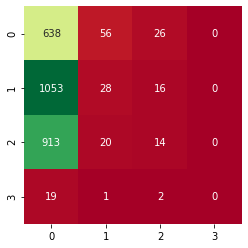

In [39]:
from sklearn.metrics import confusion_matrix
#confusion matrix for gini 
from sklearn.metrics import confusion_matrix
cnf= confusion_matrix(y_test, target_pred_gini)
print('Confusion matrix\n\n', cnf)
print("************************2D array*****************************************")
cnf_matrix = confusion_matrix(y_test, target_pred_gini)
sns.heatmap(cnf_matrix, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False)



# 4) Print the decision tree visualization for 3 different depths using given libraries.  

### Tree for GINI 

[Text(334.8, 380.52, 'X[0] <= 561.5\ngini = 0.666\nsamples = 8355\nvalue = [2277, 3210, 2791, 77]'),
 Text(167.4, 271.8, 'X[1] <= 34.5\ngini = 0.641\nsamples = 1059\nvalue = [512, 286, 241, 20]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 414.5\ngini = 0.466\nsamples = 430\nvalue = [302, 79, 34, 15]'),
 Text(41.85, 54.360000000000014, 'gini = 0.41\nsamples = 325\nvalue = [244, 45, 26, 10]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.582\nsamples = 105\nvalue = [58, 34, 8, 5]'),
 Text(251.10000000000002, 163.07999999999998, 'X[1] <= 473.5\ngini = 0.672\nsamples = 629\nvalue = [210, 207, 207, 5]'),
 Text(209.25, 54.360000000000014, 'gini = 0.659\nsamples = 447\nvalue = [111, 165, 169, 2]'),
 Text(292.95, 54.360000000000014, 'gini = 0.607\nsamples = 182\nvalue = [99, 42, 38, 3]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 1068.5\ngini = 0.659\nsamples = 7296\nvalue = [1765, 2924, 2550, 57]'),
 Text(418.5, 163.07999999999998, 'X[0] <= 907.5\ngini = 0.655\nsamples = 1594\nvalue

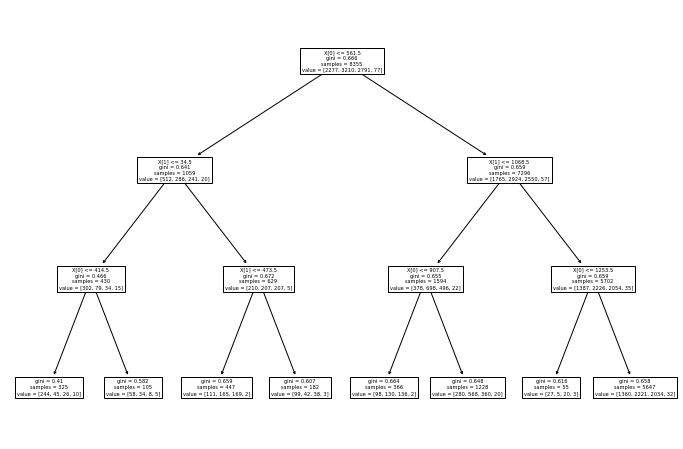

In [40]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_gini.fit(x_train, y_train))



### Tree for Entropy

[Text(334.8, 380.52, 'X[0] <= 561.5\nentropy = 1.632\nsamples = 8355\nvalue = [2277, 3210, 2791, 77]'),
 Text(167.4, 271.8, 'X[1] <= 34.5\nentropy = 1.611\nsamples = 1059\nvalue = [512, 286, 241, 20]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 21.5\nentropy = 1.265\nsamples = 430\nvalue = [302, 79, 34, 15]'),
 Text(41.85, 54.360000000000014, 'entropy = 1.582\nsamples = 22\nvalue = [7, 8, 7, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 1.212\nsamples = 408\nvalue = [295, 71, 27, 15]'),
 Text(251.10000000000002, 163.07999999999998, 'X[1] <= 473.5\nentropy = 1.639\nsamples = 629\nvalue = [210, 207, 207, 5]'),
 Text(209.25, 54.360000000000014, 'entropy = 1.595\nsamples = 447\nvalue = [111, 165, 169, 2]'),
 Text(292.95, 54.360000000000014, 'entropy = 1.535\nsamples = 182\nvalue = [99, 42, 38, 3]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 1135.5\nentropy = 1.609\nsamples = 7296\nvalue = [1765, 2924, 2550, 57]'),
 Text(418.5, 163.07999999999998, 'X[1] <= 1069.5\nentropy = 

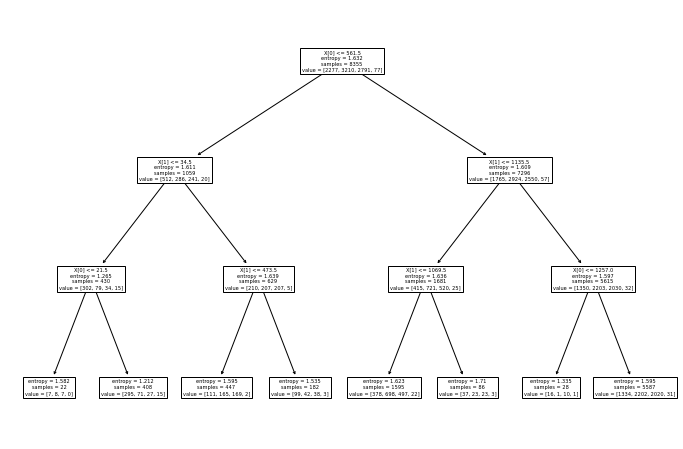

In [41]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_entropy.fit(x_train, y_train)) 

# Naive Bayes 

# 1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.

In [42]:
#We use a varibale for calling the perdefined function and we fit and predict the mdoel for all the types of naives classifiers. 

In [43]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
target_pred = gaussian.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != target_pred).sum()))

Number of mislabeled points out of a total 2786 points : 2083


In [44]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
target_pred_gaus = gaussian.predict(x_test)
accuracy_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
accuracy_gaussian

39.22

<AxesSubplot:>

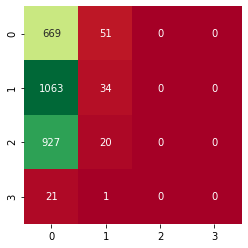

In [45]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, target_pred_gaus)
sns.heatmap(cnf_matrix, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, target_pred))

              precision    recall  f1-score   support

       brand       0.25      0.93      0.39       720
      female       0.32      0.03      0.06      1097
        male       0.00      0.00      0.00       947
     unknown       0.00      0.00      0.00        22

    accuracy                           0.25      2786
   macro avg       0.14      0.24      0.11      2786
weighted avg       0.19      0.25      0.12      2786



C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.naive_bayes import MultinomialNB
Multinomial = MultinomialNB()
Multinomial.fit(x_train, y_train)
target_pred_multi =  Multinomial.predict(x_test)
Multinomial_acc = round(Multinomial.score(x_train, y_train) * 100, 2)
Multinomial_acc

29.5

<AxesSubplot:>

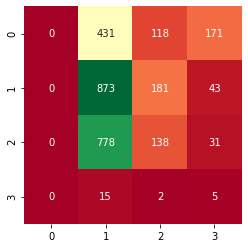

In [48]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, target_pred_multi)
sns.heatmap(cnf_matrix, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False)

In [49]:
print(classification_report(y_test, target_pred_multi))

              precision    recall  f1-score   support

       brand       0.00      0.00      0.00       720
      female       0.42      0.80      0.55      1097
        male       0.31      0.15      0.20       947
     unknown       0.02      0.23      0.04        22

    accuracy                           0.36      2786
   macro avg       0.19      0.29      0.20      2786
weighted avg       0.27      0.36      0.28      2786



C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.naive_bayes import  BernoulliNB
Bernoulli = BernoulliNB()
Bernoulli.fit(x_train, y_train)
target_pred_bern =  Bernoulli.predict(x_test)
Bernoulli_acc = round(Bernoulli.score(x_train, y_train) * 100, 2)
Bernoulli_acc

38.42

<AxesSubplot:>

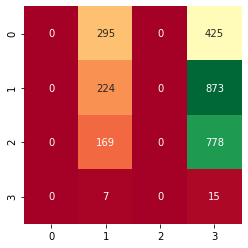

In [51]:
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, target_pred_bern)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False)

In [52]:
print(classification_report(y_test, target_pred_bern))

              precision    recall  f1-score   support

       brand       0.00      0.00      0.00       720
      female       0.32      0.20      0.25      1097
        male       0.00      0.00      0.00       947
     unknown       0.01      0.68      0.01        22

    accuracy                           0.09      2786
   macro avg       0.08      0.22      0.07      2786
weighted avg       0.13      0.09      0.10      2786



C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.naive_bayes import  ComplementNB
Complement = ComplementNB()
Complement.fit(x_train, y_train)
target_pred_comp =  Complement.predict(x_test)
Complement_acc = round(Complement.score(x_train, y_train) * 100, 2)
Complement_acc

35.57

<AxesSubplot:>

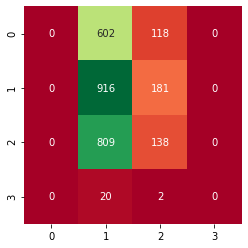

In [54]:
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test,target_pred_comp )
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False)

In [55]:
print(classification_report(y_test, target_pred_comp))

              precision    recall  f1-score   support

       brand       0.00      0.00      0.00       720
      female       0.39      0.84      0.53      1097
        male       0.31      0.15      0.20       947
     unknown       0.00      0.00      0.00        22

    accuracy                           0.38      2786
   macro avg       0.18      0.25      0.18      2786
weighted avg       0.26      0.38      0.28      2786



C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.naive_bayes import  CategoricalNB
Categorical = CategoricalNB()
Categorical.fit(x_train, y_train)
target_pred_cate =  Categorical.predict(x_test)
Categorical_acc = round(Categorical.score(x_train, y_train) * 100, 2)
Categorical_acc

ValueError: Negative values in data passed to CategoricalNB (input X)

<AxesSubplot:>

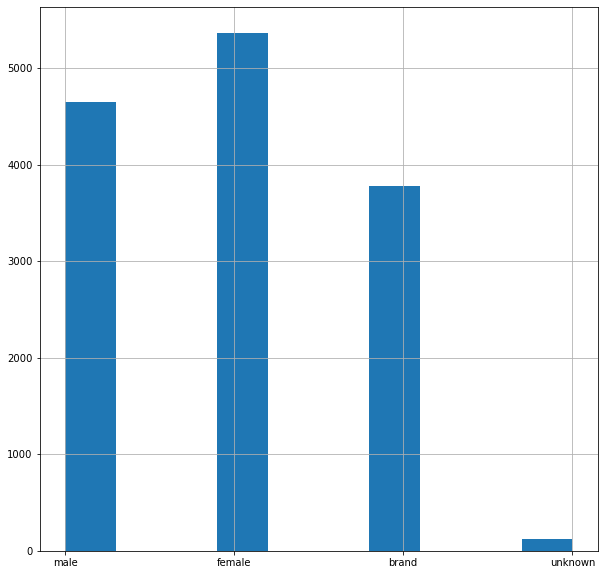

In [57]:
dataset["gender"].hist(figsize = (10,10))

<AxesSubplot:ylabel='None'>

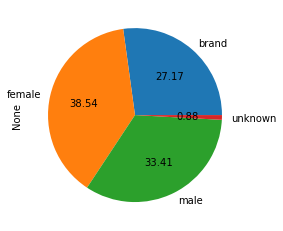

In [58]:
dataset.groupby('gender').size().plot(kind='pie', autopct='%.2f')